## Hyparameter Tuning- Grid search vs Bayesian optimization On Breast Cancer Prediction Dataset

In machine learning, <b>hyperparameter optimization or tuning</b> is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process.


<b>Grid Search</b> is the process of scanning the data to configure optimal parameters for a given model. Depending on the type of model utilized, certain parameters are necessary. Grid-searching does NOT only apply to one model type. Grid-searching can be applied across machine learning to calculate the best parameters to use for any given model. It is important to note that Grid-searching can be extremely computationally expensive and may take your machine quite a long time to run. Grid-Search will build a model on each parameter combination possible. It iterates through every parameter combination and stores a model for each combination.

<b>Bayesian Optimization</b> provides a technique based on Bayes Theorem to direct a search of a global optimization problem that is efficient and effective. It works by building a probabilistic model of the objective function, called the surrogate function, that is then searched efficiently with an acquisition function before candidate samples are chosen for evaluation on the real objective function.
Bayesian Optimization is often used in applied machine learning to tune the hyperparameters of a given well-performing model on a validation dataset.It is an approach that is most useful for objective functions that are complex, noisy, and/or expensive to evaluate.

Bayes Theorem is an approach for calculating the conditional probability of an event:
<li>P(A|B) = P(B|A) * P(A) / P(B)</li>
We can simplify this calculation by removing the normalizing value of P(B) and describe the conditional probability as a proportional quantity. This is useful as we are not interested in calculating a specific conditional probability, but instead in optimizing a quantity.
<li>P(A|B) = P(B|A) * P(A)</li>
The conditional probability that we are calculating is referred to generally as the posterior probability, the reverse conditional probability is sometimes referred to as the likelihood, and the marginal probability is referred to as the prior probability, for example:
<li>posterior = likelihood * prior</li>

This provides a framework that can be used to quantify the beliefs about an unknown objective function given samples from the domain and their evaluation via the objective function.

We can devise specific samples (x1, x2, …, xn) and evaluate them using the objective function f(xi) that returns the cost or outcome for the sample xi. Samples and their outcome are collected sequentially and define our data D, e.g. D = {xi, f(xi), … xn, f(xn)} and is used to define the prior. The likelihood function is defined as the probability of observing the data given the function P(D | f). This likelihood function will change as more observations are collected.
<li>P(f|D) = P(D|f) * P(f)</li>
The posterior represents everything we know about the objective function. It is an approximation of the objective function and can be used to estimate the cost of different candidate samples that we may want to evaluate.

<b>Surrogate Function:</b> Bayesian approximation of the objective function that can be sampled efficiently.
The surrogate function gives us an estimate of the objective function, which can be used to direct future sampling. Sampling involves careful use of the posterior in a function known as the “acquisition” function, e.g. for acquiring more samples. We want to use our belief about the objective function to sample the area of the search space that is most likely to pay off, therefore the acquisition will optimize the conditional probability of locations in the search to generate the next sample.

<b>Acquisition Function:</b> Technique by which the posterior is used to select the next sample from the search space.

#### So, lets implement both hyperparameter tuning method for the dataset that is available on the kaggle, the Breast Canceer Prediction
Link to the kaggle dataset https://www.kaggle.com/merishnasuwal/breast-cancer-prediction-datas

In [3]:
import pandas as pd
import numpy as np


### Loading the dataset

In [5]:
df = pd.read_csv('Breast_cancer_data.csv')
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


### Dividing the value in X & Y to make prediction and spliting the dataset for training and testing

In [6]:
X = df.drop('diagnosis', axis=1)
Y = df['diagnosis']

In [7]:

from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### Importing some sklearn metrices for calculating the accuracy, precision and recall score and form a function for to calculate all the metrices

In [9]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [10]:
def summarize_classification(y_test, y_pred):
    
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)

    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print("Test data count: ",len(y_test))
    print("accuracy_count : " , num_acc)
    print("accuracy_score : " , acc)
    print("precision_score : " , prec)
    print("recall_score : ", recall)

### Importing the Grid search from the sklearn model selection and forming a variable parameter contining the max depth for fiting the decision tree with the best parameter suggested by the grid search

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [12]:
parameters = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12]}

grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=3, return_train_score=True)
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'max_depth': 7}

In [13]:
decision_tree_model = DecisionTreeClassifier(max_depth = grid_search.best_params_['max_depth']).fit(x_train, y_train)

#### Summary of the calculation metrices achieve after predicting the values for x_test and then checking the accuracy by comparing the y_test and y_pred

In [14]:
y_pred = decision_tree_model.predict(x_test)
summarize_classification(y_test, y_pred)

Test data count:  114
accuracy_count :  100
accuracy_score :  0.8771929824561403
precision_score :  0.9230769230769231
recall_score :  0.8695652173913043


#### Two popular libraries for Bayesian Optimization include

<li>Scikit-Optimize</li> 
<li>HyperOpt</li>
In machine learning, these libraries are often used to tune the hyperparameters of algorithms.
Hyperparameter tuning is a good fit for Bayesian Optimization because the evaluation function is computationally expensive (e.g. training models for each set of hyperparameters) and noisy (e.g. noise in training data and stochastic learning algorithms).

I have used Scikit-Optimize library to optimize the hyperparameters for this classification problem. The Scikit-Optimize project is designed to provide access to Bayesian Optimization for applications that use SciPy and NumPy, or applications that use scikit-learn machine learning algorithms.

#### pip install scikit-optimize is used to install it

###  importing the important libraries

In [12]:

# example of bayesian optimization with scikit-optimize
from numpy import mean
from sklearn.model_selection import cross_val_score
from skopt.space import Integer
from skopt.utils import use_named_args
from skopt import gp_minimize

 There are many warning messages while using the gp_minimize,
 such as: UserWarning: The objective has been evaluated at this point before.

This is to be expected and is caused by the same hyperparameter configuration being evaluated more than once.

In [13]:

import warnings
warnings.filterwarnings("ignore")

In [14]:
# define the model
model_tree = DecisionTreeClassifier()

#### Search Space 
It is used to set the parameter is going to tuned or the dimensionality on which wwe are apllying the hyperarameter tuning.<br>
Each search dimension can be defined either as

<li>a (lower_bound, upper_bound) tuple (for Real or Integer dimensions),</li>

<li>a (lower_bound, upper_bound, "prior") tuple (for Real dimensions),</li>

<li>as a list of categories (for Categorical dimensions), or</li>

<li>an instance of a Dimension object (Real, Integer or Categorical).</li>

Also you can refer to : https://scikit-optimize.github.io/stable/modules/generated/skopt.space.space.check_dimension.html

In [15]:
# define the search space of hyperparameters to search
search_space = [Integer(1, 12, name='max_depth')]

### use_named_args & set_params
We can use the use_named_args() decorator from the scikit-optimize project on the function definition that allows the function to be called directly with a specific set of parameters from the search space.

As such, our custom function will take the hyperparameter values as arguments, which can be provided to the model directly in order to configure it. We can define these arguments generically in python using the  **params argument to the function, then pass them to the model via the set_params function.

In [16]:
# define the function used to evaluate a given configuration
@use_named_args(search_space)
def evaluate_model(**params):
    # something
    model_tree.set_params(**params)
    # calculate 10-fold cross validation
    result = cross_val_score(model_tree, x_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
    # calculate the mean of the scores
    estimate = mean(result)
    return 1.0 - estimate

### gp_ minimize
Bayesian optimization using Gaussian Processes.<br>
If every function evaluation is expensive, for instance when the parameters are the hyperparameters of a neural network and the function evaluation is the mean cross-validation score across ten folds, optimizing the hyperparameters by standard optimization routines would take for ever!<br>
The idea is to approximate the function using a Gaussian process. In other words the function values are assumed to follow a multivariate gaussian. The covariance of the function values are given by a GP kernel between the parameters. Then a smart choice to choose the next parameter to evaluate can be made by the acquisition function over the Gaussian prior which is much quicker to evaluate.
https://scikit-optimize.github.io/stable/modules/generated/skopt.gp_minimize.html#skopt.gp_minimize

In [17]:
# perform optimization
result = gp_minimize(evaluate_model, search_space)


In [18]:
print('Best Accuracy: %.f' % (1.0 - result.fun))
print('Best Parameters: max_depth=%d' % (result.x[0]))

Best Accuracy: 1
Best Parameters: max_depth=12


In [19]:
model_tree= DecisionTreeClassifier( max_depth = result.x[0]).fit(x_train, y_train)

In [20]:
y_pred_tree = model_tree.predict(x_test)
summarize_classification(y_test, y_pred_tree)

Test data count:  114
accuracy_count :  102
accuracy_score :  0.8947368421052632
precision_score :  0.9354838709677419
recall_score :  0.8787878787878788


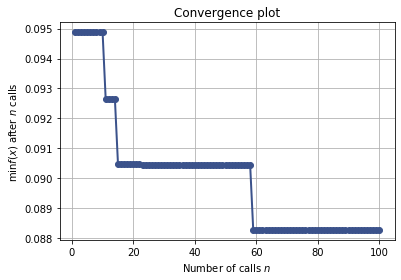

In [21]:
from skopt.plots import plot_convergence
plot_convergence(result);

#### Now using the KNeighborsClassifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
# define the model
model_kn =KNeighborsClassifier()


# define the search space of hyperparameters to search
search_space = [Integer(1, 12, name='n_neighbors'), Integer(1, 3, name='p')]

# define the function used to evaluate a given configuration
@use_named_args(search_space)
def evaluate_model(**params):
    # something
    model_kn.set_params(**params)
    # calculate 10-fold cross validation
    result = cross_val_score(model_kn, x_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
    # calculate the mean of the scores
    estimate = mean(result)
    return 1.0 - estimate

# perform optimization
result = gp_minimize(evaluate_model, search_space)
# summarizing finding:
print('Best Accuracy: %.f' % (1.0 - result.fun))
print('Best Parameters: n_neighbors=%d, p=%d' % (result.x[0], result.x[1]))

Best Accuracy: 1
Best Parameters: n_neighbors=3, p=1


In [24]:
model_kn = KNeighborsClassifier( n_neighbors = result.x[0],p=result.x[1]).fit(x_train, y_train)

In [25]:
y_pred = model_kn.predict(x_test)
summarize_classification(y_test, y_pred)

Test data count:  114
accuracy_count :  98
accuracy_score :  0.8596491228070176
precision_score :  0.8571428571428571
recall_score :  0.9090909090909091


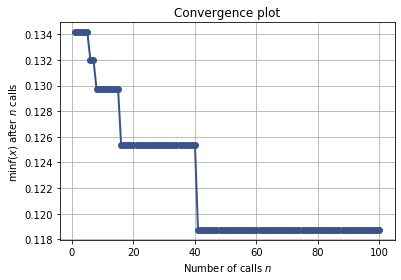

In [26]:
from skopt.plots import plot_convergence
plot_convergence(result);

In [16]:
from sklearn import tree, model_selection

In [18]:
classifer = DecisionTreeClassifier()
classifer.fit(x_train,y_train)
results = model_selection.cross_validate(classifer, x_train, y_train, cv = 10)

results

{'fit_time': array([0.00612926, 0.00793409, 0.00648522, 0.00653386, 0.00688672,
        0.00996494, 0.00953984, 0.01045251, 0.00822282, 0.0082016 ]),
 'score_time': array([0.0010345 , 0.00200129, 0.00301623, 0.0030067 , 0.00308418,
        0.004915  , 0.00572562, 0.00488901, 0.00896358, 0.00399947]),
 'test_score': array([0.91304348, 0.95652174, 0.82608696, 0.80434783, 0.91304348,
        0.95555556, 0.91111111, 0.86666667, 0.86666667, 0.97777778])}

In [21]:
print("Test Mean Score :",results.get('test_score').mean())
print("Train Mean Score :",results.get('train_score').mean())

Test Mean Score : 0.8990821256038647
